In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime, os


In [25]:
df_files = os.listdir('../../data/DataGithub/')
df_files

['code_etablissement.csv',
 'Effectifs_ecoles.csv',
 'fetes_chretiennes.csv',
 'fetes_juives.csv',
 'fetes_musulmanes.csv',
 'frequentation_cantines_v3.csv',
 'incidence RDD 3.csv',
 'incidence RDD 6.csv',
 'incidence RDD 7.csv',
 'Journees_de_greve.csv',
 'jours-feries-seuls.csv',
 'key_jours.xlsx',
 'Liste ETS_geo_AE12102020.xlsx',
 'menus_2011-2015.csv',
 'menus_2016-2019.csv',
 'missing_strikes.xlsx',
 'mouvements-sociaux-depuis-2002.csv',
 'mouvements-sociaux-depuis-2002.json',
 'orga_des_etablissements.xlsx',
 'ramadan.csv',
 'vacances_Nantes_2011-2019.csv',
 '~$Liste ETS_geo_AE12102020.xlsx']

In [29]:
df = pd.read_csv('244400404_effectifs-eleves-cleaned')
df['datetime']= df['Date'].apply( lambda string1 : datetime.datetime.strptime(string1,"%Y-%m-%d"))
df['joursem']= df['datetime'].apply( lambda date1 : date1.weekday())
df['isoweek']= df['datetime'].apply( lambda date1 : date1.isocalendar().week)
df.head()

,RowNo,Type de site,Date,Prévision,Réel,Nom du site,An,RéelMed,RéelNorm,datetime,joursem,isoweek
0,0,M/E,2011-09-06,290.0,271.0,LEDRU ROLLIN/SARAH BERNHARDT,2011,308.0,0.879870,2011-09-06,1,36
1,1,M/E,2011-09-05,95.0,102.0,BEAUJOIRE,2011,129.0,0.790698,2011-09-05,0,36
2,2,M/E,2011-09-05,167.0,171.0,CONTRIE,2011,211.0,0.810427,2011-09-05,0,36
3,3,M,2011-09-05,80.0,64.0,COUDRAY M.,2011,77.0,0.831169,2011-09-05,0,36
4,4,M,2011-09-05,73.0,77.0,FONTENY,2011,92.0,0.836957,2011-09-05,0,36


In [52]:
df_calend=pd.read_csv('../../data/SiteNantes/CSV/244400404_nombre-convives-jour-cantine-nantes-2011.csv', sep=';')
df_calend['datetime']= df_calend['Date'].apply( lambda string1 : datetime.datetime.strptime(string1,"%Y-%m-%d")) 
df_calend=df_calend['datetime'].unique()

In [53]:
len(df_calend)

1566

In [54]:
df_calend = np.sort(df_calend)

In [55]:
df_calend

array(['2011-01-03T00:00:00.000000000', '2011-01-04T00:00:00.000000000',
       '2011-01-06T00:00:00.000000000', ...,
       '2022-05-20T00:00:00.000000000', '2022-05-23T00:00:00.000000000',
       '2022-05-24T00:00:00.000000000'], dtype='datetime64[ns]')

In [56]:
df_calend.reshape(-1,1)

array([['2011-01-03T00:00:00.000000000'],
       ['2011-01-04T00:00:00.000000000'],
       ['2011-01-06T00:00:00.000000000'],
       ...,
       ['2022-05-20T00:00:00.000000000'],
       ['2022-05-23T00:00:00.000000000'],
       ['2022-05-24T00:00:00.000000000']], dtype='datetime64[ns]')

In [57]:
df_ponts=[[df_calend[i],int(min(abs(df_calend[i]-df_calend[i-1]),abs(df_calend[i+1]-df_calend[i]))/np.timedelta64(1, "D")-1)] for i in range(1,len(df_calend)-1) ]

In [59]:
df_ponts=pd.DataFrame(df_ponts)
df_ponts.rename(columns={0: 'datetime', 1: 'datelag'}, inplace=True)

In [60]:
df_ponts.head()

,datetime,datelag
0,2011-01-04,0
1,2011-01-06,0
2,2011-01-07,0
3,2011-01-10,0
4,2011-01-11,0


In [66]:
df_ponts.datelag.value_counts()

0    1511
1      29
2      23
3       1
Name: datelag, dtype: int64

In [72]:
df_ponts[df_ponts['datelag']>0]['datetime'].apply(lambda date1 : date1.year).value_counts()

2016    16
2015    10
2012     6
2017     4
2020     4
2014     3
2019     3
2021     3
2018     2
2011     1
2013     1
Name: datetime, dtype: int64

In [69]:
df_ponts[df_ponts['datelag']>0].sort_values(by=['datetime'],ascending=False).head(50)

,datetime,datelag
1478,2021-11-12,2
1421,2021-05-25,1
1404,2021-04-06,1
1305,2020-09-01,1
1286,2020-06-02,1
1275,2020-05-07,1
1272,2020-04-30,1
1196,2019-11-12,1
1149,2019-06-11,1
1124,2019-04-23,1


In [93]:
df_ponts[df_ponts['datelag']>0]['datetime'].apply(lambda date1 : date1.weekday()).value_counts()

1    24
4    14
3     8
0     7
Name: datetime, dtype: int64

In [61]:
df=pd.merge(df, df_ponts, how='left', on='datetime')

In [62]:
df['datelag'].fillna(0, inplace=True)

In [63]:
df.sort_values(by='datelag', ascending=False).head(50)

,RowNo,Type de site,Date,Prévision,Réel,Nom du site,An,RéelMed,RéelNorm,datetime,joursem,isoweek,datelag
10198,10480,M/E,2015-06-30,227.0,213.0,PORT BOYER,2015,240.0,0.887500,2015-06-30,1,27,3.0
10200,10482,M/E,2015-06-30,49.0,48.0,JONELIERE,2015,128.0,0.375000,2015-06-30,1,27,3.0
10208,10490,E,2015-06-30,73.0,59.0,GUSTAVE ROCH E,2015,70.0,0.842857,2015-06-30,1,27,3.0
10207,10489,M,2015-06-30,81.0,81.0,PAULINE KERGOMARD,2015,76.0,1.065789,2015-06-30,1,27,3.0
10206,10488,M/E,2015-06-30,91.0,89.0,REFORMES,2015,109.0,0.816514,2015-06-30,1,27,3.0
10205,10487,M/E,2015-06-30,81.0,80.0,ALPHONSE BRAUD,2015,130.0,0.615385,2015-06-30,1,27,3.0
10204,10486,M,2015-06-30,77.0,67.0,MAISDON PAJOT,2015,147.0,0.455782,2015-06-30,1,27,3.0
10203,10485,E,2015-06-30,126.0,113.0,JEAN JAURES,2015,121.0,0.933884,2015-06-30,1,27,3.0
10202,10484,M/E,2015-06-30,117.0,115.0,VILLA MARIA,2015,115.0,1.000000,2015-06-30,1,27,3.0
10201,10483,M,2015-06-30,63.0,59.0,COTE D'OR,2015,58.0,1.017241,2015-06-30,1,27,3.0


<AxesSubplot:xlabel='datelag'>

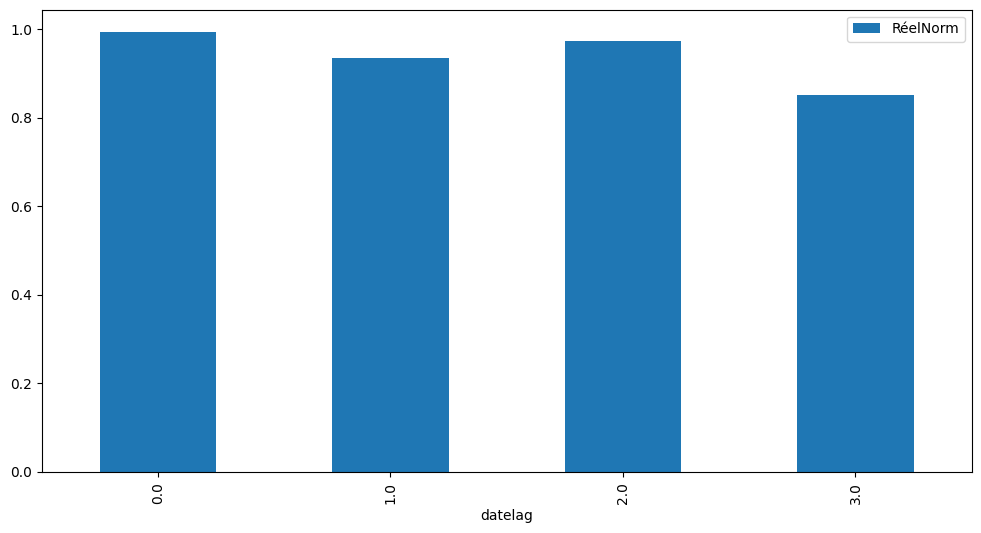

In [94]:
df[['datelag','RéelNorm']].groupby('datelag').mean().plot(kind='bar', figsize=(12,6))

In [73]:
df[['datelag','RéelNorm']].groupby('datelag').mean()

,RéelNorm
datelag,
0.0,0.993829
1.0,0.933894
2.0,0.973284
3.0,0.850134


In [95]:
df[['datelag','RéelNorm']].groupby('datelag').median()

,RéelNorm
datelag,
0.0,1.000000
1.0,0.981928
2.0,0.976959
3.0,0.887500


In [75]:
df[['datelag','RéelNorm']].groupby('datelag').count()

,RéelNorm
datelag,
0.0,122910
1.0,2173
2.0,2005
3.0,81


In [96]:
df[df['joursem']==0][['datelag','RéelNorm']].groupby('datelag').mean()

,RéelNorm
datelag,
0.0,0.972368
2.0,0.868151


In [23]:
df[df.datelag>0].Date.value_counts().shape

(70,)

In [97]:
df.keys()

Index(['RowNo', 'Type de site', 'Date', 'Prévision', 'Réel', 'Nom du site',
       'An', 'RéelMed', 'RéelNorm', 'datetime', 'joursem', 'isoweek',
       'datelag'],
      dtype='object')

In [102]:
df[df['datelag']==1][['Nom du site','RéelNorm']].groupby('Nom du site').mean().sort_values(by='RéelNorm', ascending=True).head(30)

,RéelNorm
Nom du site,
CHATAIGNIERS,0.717887
STALINGRAD,0.719732
CHATAIGNIERS M,0.824762
JOSEPH BLANCHART,0.828644
JEAN ZAY,0.833458
GEORGES BRASSENS,0.839229
GUSTAVE ROCH M,0.841417
LOUISE MICHEL,0.858858
STALINGRAD/FOYER MANU,0.863850
